# CAR PRICE PREDICTION

## Step 1: Loading and Preprocessing

In [4]:
# Import Necessary Datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [5]:
# Load Datasets

df=pd.read_csv("CarPrice_Assignment.csv")

In [6]:
# Display first 5 rows:

df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# Basic Info

print("Shape of the dataset",df.shape)
print("\nData types of the dataset",df.dtypes)
print("\nMissing Values in the dataset",df.isnull().sum())

Shape of the dataset (205, 26)

Data types of the dataset car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Missing Values in the dataset car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel     

In [12]:
# Extract 'CarBrand' from 'CarName' and fix the spellings

df['CarBrand']=df['CarName'].apply(lambda x:x.split(' ')[0].lower())
df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
df['CarBrand']=df['CarBrand'].replace({'vw':'volkswagen','vokswagen':'volkswagen','toyouta':'toyota','maxda':'mazda','porcshce':'porsche'})
df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
df.drop(['CarName'],axis=1,inplace=True)

In [18]:
# Separate target and features

X=df.drop(['price'],axis=1)
y=df['price']

In [20]:
# Identify the categorical and numerical columns

categorical_cols=X.select_dtypes(include='object').columns.tolist()
numerical_cols=X.select_dtypes(include=np.number).columns.tolist()

In [22]:
# Creating preprocessing for categorical and numerical values.

preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_cols),
        ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),categorical_cols)
    ])

## Step 2: Model Implementation

In [25]:
# Import libraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np

In [26]:
#Train-Test-Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
#Models to Evaluate

models={ 
    'Linear Regression':LinearRegression(),
    'Decision Tree':DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

results = []

for name,model in models.items():
    pipeline=Pipeline([
        ('preprocessor',preprocessor),
        ('regressor',model)
    ])

pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MSE': round(mse, 2),
        'MAE': round(mae, 2)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by='R2 Score', ascending=False)
    


C:\Users\liana\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Model,R2 Score,MSE,MAE
0,Support Vector Regressor,-0.0999,86832364.57,5695.91


C:\Users\liana\AppData\Local\Temp\ipykernel_23708\1270767539.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')


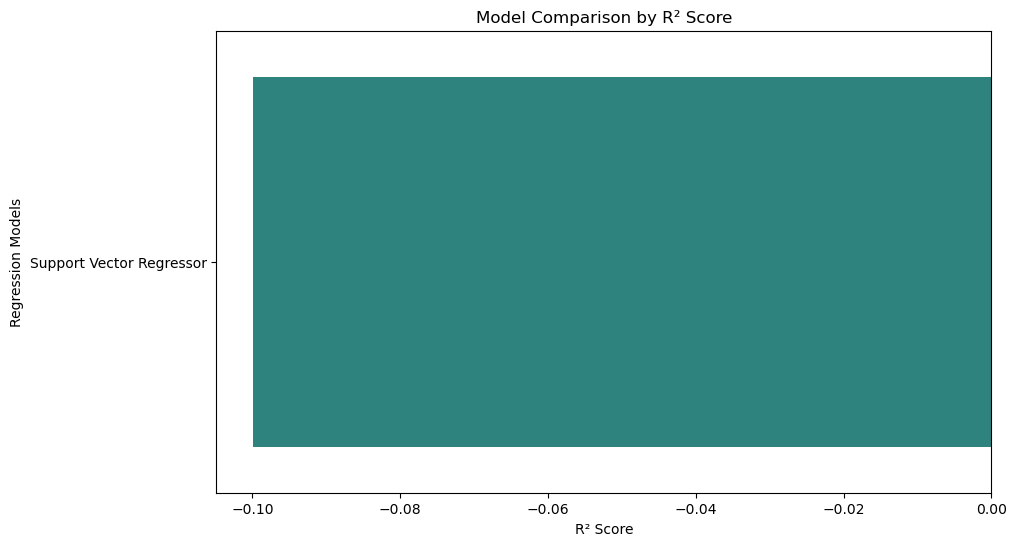

In [31]:
# Plot Model Comparison

# Bar plot of R² scores
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison by R² Score')
plt.xlabel('R² Score')
plt.ylabel('Regression Models')
plt.show()

## Step 3: Model Evaluation

In [34]:
print("Model Performance Summary:")
display(results_df.sort_values(by='R2 Score', ascending=False))

Model Performance Summary:


,Model,R2 Score,MSE,MAE
0,Support Vector Regressor,-0.0999,86832364.57,5695.91


## Step 4: Feature Importance

In [39]:
# Fit the preprocessor to get column names
preprocessor.fit(X_train)

# Get transformed feature names
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(cat_features)

In [41]:
# Rebuild pipeline for best model (Gradient Boosting here)
from sklearn.ensemble import GradientBoostingRegressor

gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['car_ID', 'symboling',
                                                   'wheelbase', 'carlength',
                                                   'carwidth', 'carheight',
                                                   'curbweight', 'enginesize',
                                                   'boreratio', 'stroke',
                                                   'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem',
                                                   'CarBrand'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

C:\Users\liana\AppData\Local\Temp\ipykernel_23708\381613259.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='crest')


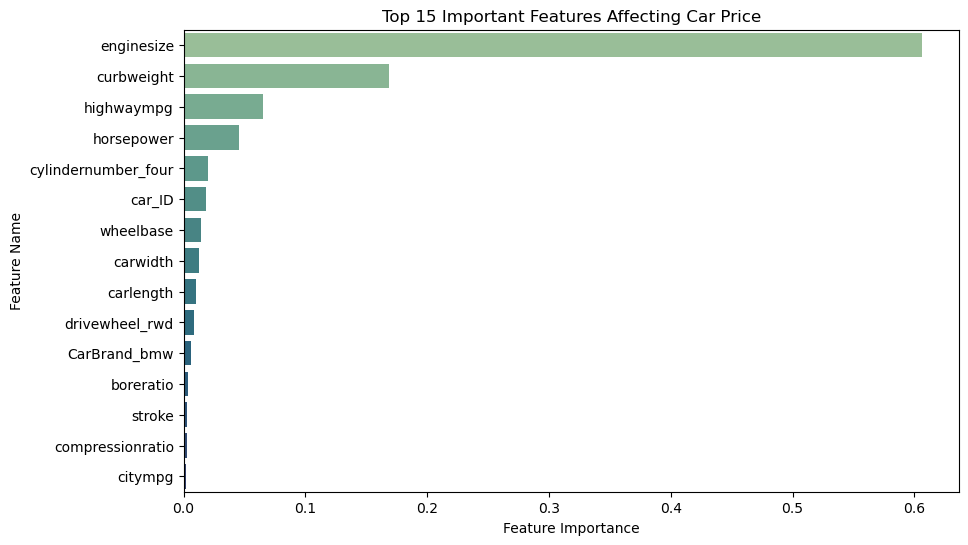

In [43]:
# Extract the regressor from pipeline
gb_model = gb_pipeline.named_steps['regressor']

# Feature importances
importances = gb_model.feature_importances_

# Create DataFrame
feat_imp_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='crest')
plt.title('Top 15 Important Features Affecting Car Price')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

## Step 5: Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the pipeline again
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Define parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_samples_split': [2, 5]
}

# Grid Search
grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Best Parameters and Score
print("Best R² Score:", round(grid_search.best_score_, 4))
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest R² Score:", r2_score(y_test, y_pred))
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best R² Score: 0.8774
Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}

Test R² Score: 0.9287832787896837
Test MSE: 5622134.326207969
Test MAE: 1705.3792065543523


C:\Users\liana\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
